In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.linear_model import LinearRegression

% matplotlib inline

In [58]:
users = pd.read_csv('myanimelist/users_filtered.csv')
animes = pd.read_csv('myanimelist/anime_filtered.csv')
user_animes = pd.read_csv('manipulated_data/UserAnimeRandom.csv')

In [59]:
# Adds age column
users['age'] = users['birth_date'].apply(lambda x: 2018 - int(x.split("-")[0]))

# Merges user_animes with users
merged = users.merge(user_animes, left_on='username', right_on='username', how='inner')
merged = merged.merge(animes, left_on='anime_id', right_on='anime_id', how='inner')

#Adds completion column
merged['my_completion'] = round((merged['my_watched_episodes']/merged['episodes']),2)

In [60]:
display(merged)

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,...,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,my_completion
0,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],1.00
1,ilikewhiterice,142519,13,355,55,104,75,106.93,Male,"Brentwood, New Hampshire",...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],1.00
2,Sinnu,1321457,4,498,0,0,429,91.57,Male,France,...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],0.00
3,anifantasy,4666359,3,154,16,19,34,59.66,Female,mysterious,...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],1.00
4,GodsClown,251214,22,185,3,1,93,74.28,Male,"Santa Barbara, California",...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],1.00
5,rnauser,1186697,11,342,12,5,70,75.73,Male,"Örebro, Sweden",...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],1.00
6,AmazinFlyinBrick,5141645,24,449,269,7,571,129.51,Male,Georgia,...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],0.00
7,KACI,118162,3,419,9,0,373,100.53,Male,"Ruse , Bulgaria",...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],1.00
8,GaryL,4884322,2,327,9,33,1,121.80,Male,Brazil,...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],1.00
9,Puali_huntess,175982,35,340,18,16,71,117.01,Female,Puerto Rico,...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],1.00


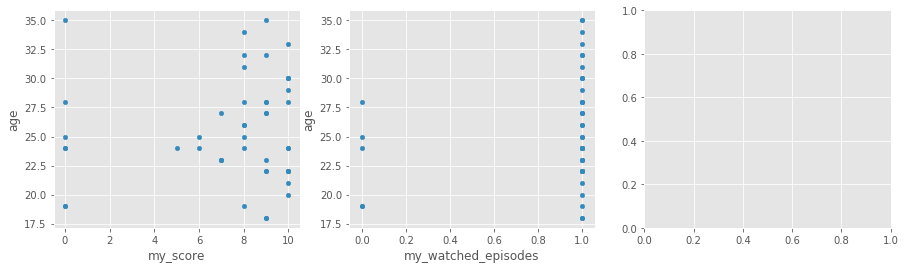

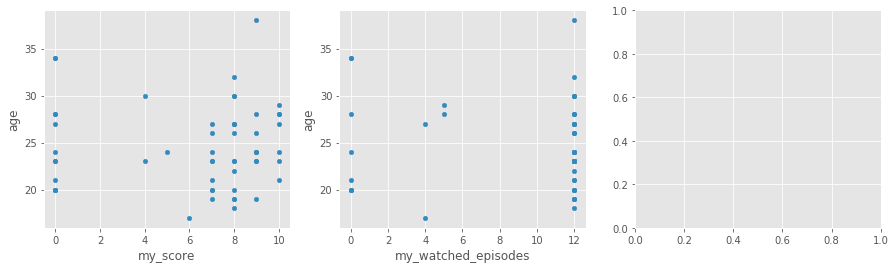

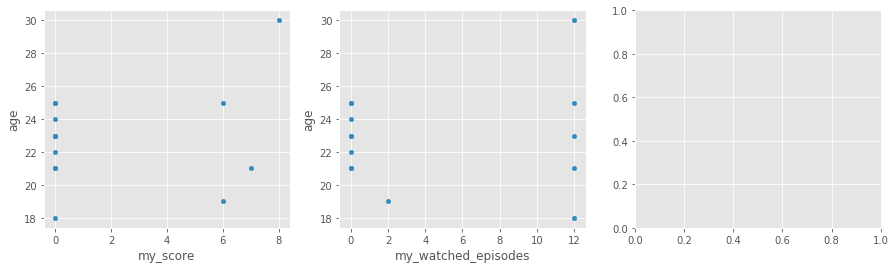

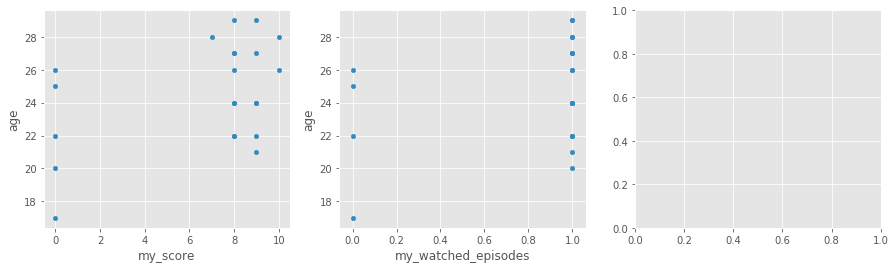

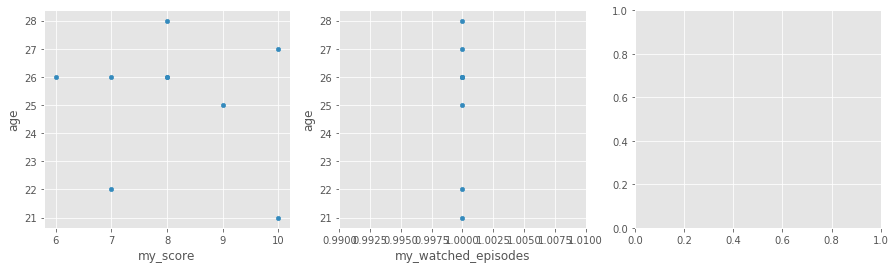

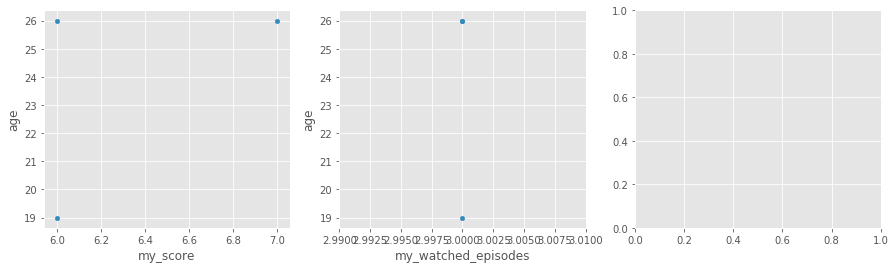

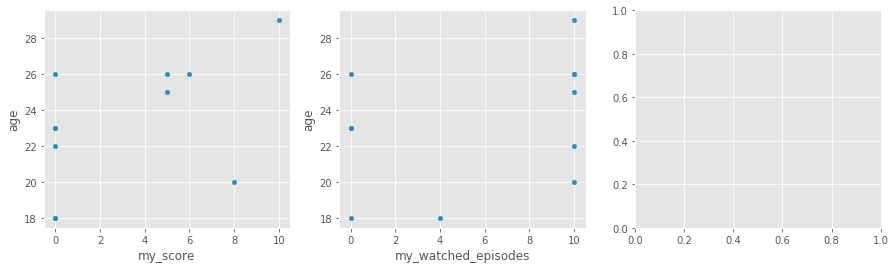

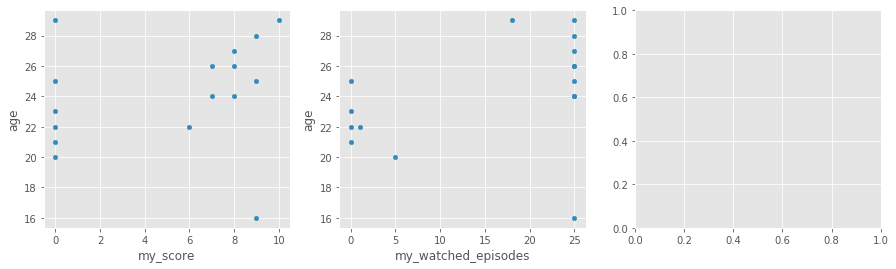

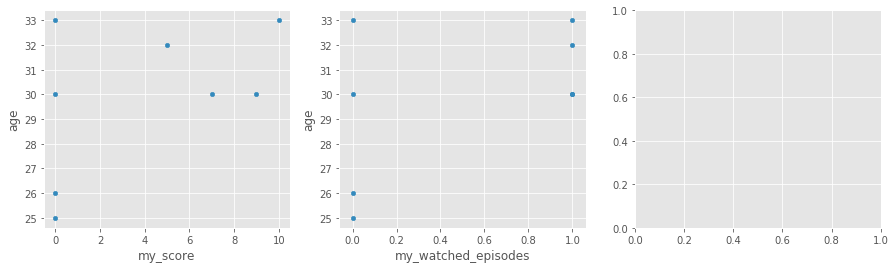

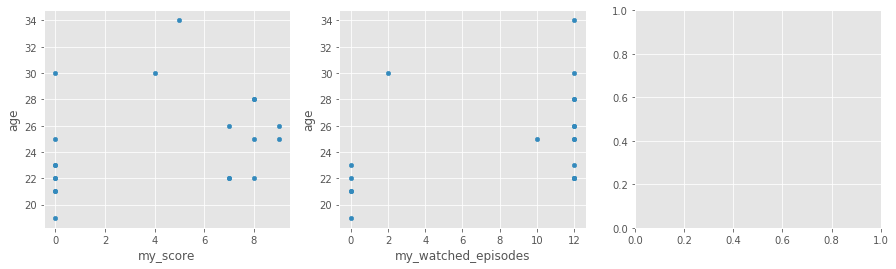

In [61]:
count = 0
for anime_id in merged.anime_id.unique():
    if (not np.isnan(anime_id) and count < 10):
        anime_relation = merged[merged.anime_id == anime_id]

        figs, axes = plt.subplots(1,3,figsize=(15,4))
        anime_relation[['my_score','age']].plot.scatter(x='my_score',y='age',ax=axes[0])
        anime_relation[['my_watched_episodes','age']].plot.scatter(x='my_watched_episodes',y='age',ax=axes[1])
#         anime_relation[['gender', 'my_watched_episodes']].plot.bar(x='gender',y='my_watched_episodes',ax=axes[2])
        count += 1


In [65]:
a = merged[['age', 'episodes','my_completion']]
a = a.set_index('age')
a.plot.bar()

32000

In [41]:
merged.columns.values

array(['username', 'user_id', 'user_watching', 'user_completed',
       'user_onhold', 'user_dropped', 'user_plantowatch',
       'user_days_spent_watching', 'gender', 'location', 'birth_date',
       'access_rank', 'join_date', 'last_online', 'stats_mean_score',
       'stats_rewatched', 'stats_episodes', 'age', 'Unnamed: 0',
       'anime_id', 'my_watched_episodes', 'my_start_date',
       'my_finish_date', 'my_score', 'my_status', 'my_rewatching',
       'my_rewatching_ep', 'my_last_updated', 'my_tags', 'title',
       'title_english', 'title_japanese', 'title_synonyms', 'image_url',
       'type', 'source', 'episodes', 'status', 'airing', 'aired_string',
       'aired', 'duration', 'rating', 'score', 'scored_by', 'rank',
       'popularity', 'members', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre',
       'opening_theme', 'ending_theme'], dtype=object)